# Filter and analyze an ArchR project

# Set-up

In [1]:
# Load libraries
suppressMessages(library(Seurat))
suppressMessages(library(ArchR))
suppressMessages(library(parallel))
suppressMessages(library(tidyverse))

Warning message:
“package ‘S4Vectors’ was built under R version 4.3.2”
Warning message:
“package ‘BiocGenerics’ was built under R version 4.3.2”
Warning message:
“package ‘GenomicRanges’ was built under R version 4.3.2”
Warning message:
“package ‘IRanges’ was built under R version 4.3.2”
Warning message:
“package ‘GenomeInfoDb’ was built under R version 4.3.2”
Warning message:
“package ‘SummarizedExperiment’ was built under R version 4.3.2”
Warning message:
“package ‘MatrixGenerics’ was built under R version 4.3.2”
Warning message:
“package ‘Biobase’ was built under R version 4.3.2”


In [2]:
# Move the working directory 
set.seed(1234)
addArchRThreads(3)
setwd("/cellar/users/aklie/data/datasets/igvf_sc-islet_10X-Multiome/annotation/timecourse/A2_control/archr")

Setting default number of Parallel threads to 3.



In [3]:
# Add annotation
addArchRGenome("hg38")

Setting default genome to Hg38.



In [ ]:
# Paths
annotations_path = "/cellar/users/aklie/data/datasets/igvf_sc-islet_10X-Multiome/annotation/timecourse/A2_control/A2_control_RNA_celltype.txt"

# Load the ArchR project

In [4]:
# Load the ArchR project
proj = loadArchRProject(path = "./")
proj

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .____

class: ArchRProject 
outputDirectory: /cellar/users/aklie/data/datasets/igvf_sc-islet_10X-Multiome/annotation/timecourse/A2_control/archr 
samples(3): dm35a dm45a dm25a
sampleColData names(1): ArrowFiles
cellColData names(23): Sample TSSEnrichment ... ReadsInPeaks FRIP
numberOfCells(1): 11054
medianTSS(1): 12.305
medianFrags(1): 19913

In [6]:
# Read annotations for filtering and grouping
annotations = read.csv(annotations_path, row.names = 1, sep = "\t", header = FALSE)
annotations = as.data.frame(annotations)
cellids = rownames(annotations)

In [7]:
# Get the ids where the annotations match the cellids
matched_ids = intersect(cellids, rownames(proj@cellColData))
idxSample <- BiocGenerics::which(proj$cellNames %in% matched_ids)

In [8]:
# Subset the project
proj <- proj[idxSample,]
annotations = annotations[proj$cellNames, ]
proj$annotation <- annotations
group_by = "annotation"

In [10]:
# Save filtered ArchR project
print("Saving ArchR project\n")
proj = saveArchRProject(
  ArchRProj = proj,
  outputDirectory = "/cellar/users/aklie/data/datasets/igvf_sc-islet_10X-Multiome/annotation/timecourse/A2_control/filtered_archr",
  dropCells = TRUE,
  load = TRUE
)

[1] "Saving ArchR project\n"


Copying ArchRProject to new outputDirectory : /cellar/users/aklie/data/datasets/igvf_sc-islet_10X-Multiome/annotation/timecourse/A2_control/filtered_archr

Copying Arrow Files...

Getting ImputeWeights

No imputeWeights found, returning NULL

Copying Other Files...

Copying Other Files (1 of 10): ArchRLogs

Copying Other Files (2 of 10): cell_metadata.tsv

Copying Other Files (3 of 10): Embeddings

Copying Other Files (4 of 10): GroupBigWigs

Copying Other Files (5 of 10): GroupCoverages

Copying Other Files (6 of 10): IterativeLSI

Copying Other Files (7 of 10): Matrices

Copying Other Files (8 of 10): PeakCalls

Copying Other Files (9 of 10): Plots

Copying Other Files (10 of 10): Rplots.pdf

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                            

# Analysis of filtered project

In [14]:
# Check the ArchR project again
proj


           ___      .______        ______  __    __  .______      
          /   \     |   _  \      /      ||  |  |  | |   _  \     
         /  ^  \    |  |_)  |    |  ,----'|  |__|  | |  |_)  |    
        /  /_\  \   |      /     |  |     |   __   | |      /     
       /  _____  \  |  |\  \\___ |  `----.|  |  |  | |  |\  \\___.
      /__/     \__\ | _| `._____| \______||__|  |__| | _| `._____|
    



class: ArchRProject 
outputDirectory: /cellar/users/aklie/data/datasets/igvf_sc-islet_10X-Multiome/annotation/timecourse/A2_control/filtered_archr 
samples(3): dm25a dm45a dm35a
sampleColData names(1): ArrowFiles
cellColData names(23): Sample TSSEnrichment ... ReadsInPeaks FRIP
numberOfCells(1): 6288
medianTSS(1): 12.254
medianFrags(1): 20749.5

In [15]:
# Set new working directory
setwd("/cellar/users/aklie/data/datasets/igvf_sc-islet_10X-Multiome/annotation/timecourse/A2_control/filtered_archr")

In [18]:
# Run iterative LSI
proj = addIterativeLSI(
    proj,  
    useMatrix = "TileMatrix",
    name = "IterativeLSI_250000", 
    varFeatures = 250000, 
    seed = 1234,
    force = TRUE
)

Checking Inputs...

ArchR logging to : ArchRLogs/ArchR-addIterativeLSI-2aef7f6ec3aa93-Date-2024-03-18_Time-16-23-20.430973.log
If there is an issue, please report to github with logFile!



2024-03-18 16:23:22.245447 : Computing Total Across All Features, 0.022 mins elapsed.

2024-03-18 16:23:28.907147 : Computing Top Features, 0.133 mins elapsed.

###########
2024-03-18 16:23:32.106142 : Running LSI (1 of 2) on Top Features, 0.187 mins elapsed.
###########

2024-03-18 16:23:32.154658 : Creating Partial Matrix, 0.188 mins elapsed.

2024-03-18 16:24:50.934922 : Computing LSI, 1.501 mins elapsed.

2024-03-18 16:34:31.837795 : Identifying Clusters, 11.182 mins elapsed.

2024-03-18 16:34:46.362342 : Identified 6 Clusters, 11.424 mins elapsed.

2024-03-18 16:34:46.386128 : Saving LSI Iteration, 11.425 mins elapsed.

2024-03-18 16:35:22.556124 : Creating Cluster Matrix on the total Group Features, 12.028 mins elapsed.

2024-03-18 16:36:40.619776 : Computing Variable Features, 13.329 mins elapsed.

###########
2024-03-18 16:36:40.980422 : Running LSI (2 of 2) on Variable Features, 13.335 mins elapsed.
###########

2024-03-18 16:36:41.023049 : Creating Partial Matrix, 13.335 mins

In [22]:
# Add cluster information
proj = addClusters(
    proj, 
    reducedDims = "IterativeLSI_250000",
    method = "Seurat",
    name = "Clusters_250000_r0.8",
    resolution = 0.8,
    seed = 1234,
    force = TRUE
)

ArchR logging to : ArchRLogs/ArchR-addClusters-2aef7f408c2313-Date-2024-03-19_Time-07-01-24.873444.log
If there is an issue, please report to github with logFile!



2024-03-19 07:01:25.310391 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.002 mins elapsed.

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6288
Number of edges: 396582

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7823
Number of communities: 10
Elapsed time: 0 seconds


1 singletons identified. 9 final clusters.

2024-03-19 07:01:35.165628 : Testing Outlier Clusters, 0.167 mins elapsed.

2024-03-19 07:01:35.170925 : Assigning Cluster Names to 9 Clusters, 0.167 mins elapsed.

2024-03-19 07:01:35.268053 : Finished addClusters, 0.168 mins elapsed.



In [24]:
proj <- addUMAP(
    ArchRProj = proj, 
    reducedDims = "IterativeLSI_250000",
    name = "UMAP", 
    dimsToUse = c(1:50),
    nNeighbors = 30,
    minDist = 0.1,
    metric = "cosine",
    seed = 1234,
    force = TRUE
)

Filtering 20 dims correlated > 0.75 to log10(depth + 1)

07:02:05 UMAP embedding parameters a = 1.577 b = 0.8951

07:02:05 Read 6288 rows and found 30 numeric columns

07:02:05 Using Annoy for neighbor search, n_neighbors = 30

07:02:05 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

07:02:06 Writing NN index file to temp file /tmp/RtmpJEIUf1/file2aef7f668a7b2c

07:02:06 Searching Annoy index using 48 threads, search_k = 3000

07:02:07 Annoy recall = 100%

07:02:08 Commencing smooth kNN distance calibration using 48 threads
 with target n_neighbors = 30

07:02:09 Initializing from normalized Laplacian + noise (using irlba)

07:02:09 Commencing optimization for 500 epochs, with 319348 positive edges

07:02:20 Optimization finished

07:02:20 Creating temp model dir /tmp/

In [49]:
p1 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", name = "Sample", embedding = "UMAP")
p2 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", name = "nFrags", embedding = "UMAP")
p3 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", name = "annotation", embedding = "UMAP")
p4 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", name = "Clusters", embedding = "UMAP")
plotPDF(p1, p2, p3, p4, name = "Plot-UMAP-Sample-nFrags-annotation-Clusters.pdf", ArchRProj = proj, addDOC = FALSE, width = 5, height = 5)

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-2aef7f22a5d043-Date-2024-03-19_Time-07-12-44.455684.log
If there is an issue, please report to github with logFile!



Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-2aef7f22a5d043-Date-2024-03-19_Time-07-12-44.455684.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-2aef7f7a7cb38-Date-2024-03-19_Time-07-12-45.32779.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-2aef7f7a7cb38-Date-2024-03-19_Time-07-12-45.32779.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-2aef7f2e2e50ba-Date-2024-03-19_Time-07-12-46.52052.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-2aef7f2e2e50ba-Date-2024-03-19_Time-07-12-46.52052.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-2aef7ff84ef16-Date-2024-03-19_Time-07-12-47.383819.log
If 

In [51]:
proj@reducedDims

List of length 3
names(3): IterativeLSI IterativeLSI_250000 Harmony

In [ ]:
proj <- addUMAP(
    ArchRProj = proj, 
    reducedDims = "IterativeLSI_250000",
    name = "UMAP", 
    dimsToUse = c(1:50),
    nNeighbors = 30,
    minDist = 0.1,
    metric = "cosine",
    seed = 1234,
    force = TRUE
)

In [48]:
proj <- addHarmony(
    ArchRProj = proj,
    reducedDims = "IterativeLSI_250000",
    name = "Harmony",
    groupBy = "Sample"
)

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony converged after 3 iterations



In [ ]:
# Add cluster information
proj = addClusters(
    proj, 
    reducedDims = "Harmony",
    method = "Seurat",
    name = "Clusters_Harmony_r0.8",
    resolution = 0.8,
    seed = 1234,
    force = TRUE
)

In [53]:
proj <- addUMAP(
    ArchRProj = proj, 
    reducedDims = "Harmony",
    name = "UMAPHarmony", 
    nNeighbors = 30,
    minDist = 0.5,
    metric = "cosine",
    seed = 1234,
    force = TRUE
)

07:15:49 UMAP embedding parameters a = 0.583 b = 1.334

07:15:49 Read 6288 rows and found 30 numeric columns

07:15:49 Using Annoy for neighbor search, n_neighbors = 30

07:15:49 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

07:15:50 Writing NN index file to temp file /tmp/RtmpJEIUf1/file2aef7f230431f6

07:15:50 Searching Annoy index using 48 threads, search_k = 3000

07:15:51 Annoy recall = 100%

07:15:52 Commencing smooth kNN distance calibration using 48 threads
 with target n_neighbors = 30

07:15:53 Initializing from normalized Laplacian + noise (using irlba)

07:15:53 Commencing optimization for 500 epochs, with 320040 positive edges

07:16:05 Optimization finished

07:16:05 Creating temp model dir /tmp/RtmpJEIUf1/dir2aef7f31295828

07:16:05 Creating dir /tmp/R

In [54]:
p1 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", name = "Sample", embedding = "UMAPHarmony")
p2 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", name = "nFrags", embedding = "UMAPHarmony")
p3 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", name = "annotation", embedding = "UMAPHarmony")
p4 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", name = "Clusters", embedding = "UMAPHarmony")
plotPDF(p1, p2, p3, p4, name = "Plot-UMAPHarmony-Sample-nFrags-annotation-Clusters.pdf", ArchRProj = proj, addDOC = FALSE, width = 5, height = 5)

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-2aef7f27e9dd80-Date-2024-03-19_Time-07-16-07.754871.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-2aef7f27e9dd80-Date-2024-03-19_Time-07-16-07.754871.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-2aef7f2d72e4c3-Date-2024-03-19_Time-07-16-08.625855.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-2aef7f2d72e4c3-Date-2024-03-19_Time-07-16-08.625855.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-2aef7f4c42856a-Date-2024-03-19_Time-07-16-09.725875.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEm

In [43]:
p <- plotBrowserTrack(
    ArchRProj = proj, 
    groupBy = "annotation", 
    geneSymbol = c("INS", "GCG", "TPH1", "SST"), 
    upstream = 50000,
    downstream = 50000
)

ArchR logging to : ArchRLogs/ArchR-plotBrowserTrack-2aef7f3c4a2686-Date-2024-03-19_Time-07-10-03.264492.log
If there is an issue, please report to github with logFile!

2024-03-19 07:10:03.49603 : Validating Region, 0.004 mins elapsed.



GRanges object with 4 ranges and 2 metadata columns:
      seqnames              ranges strand |     gene_id      symbol
         <Rle>           <IRanges>  <Rle> | <character> <character>
  [1]    chr11     2159779-2161341      - |        3630         INS
  [2]     chr2 162142873-162152404      - |        2641         GCG
  [3]    chr11   18017564-18042426      - |        7166        TPH1
  [4]     chr3 187668906-187670399      - |        6750         SST
  -------
  seqinfo: 24 sequences from hg38 genome


2024-03-19 07:10:03.579084 : Adding Bulk Tracks (1 of 4), 0.005 mins elapsed.

2024-03-19 07:10:05.131891 : Adding Feature Tracks (1 of 4), 0.031 mins elapsed.

2024-03-19 07:10:05.234144 : Adding Gene Tracks (1 of 4), 0.033 mins elapsed.

2024-03-19 07:10:05.562546 : Plotting, 0.038 mins elapsed.

2024-03-19 07:10:06.992205 : Adding Bulk Tracks (2 of 4), 0.062 mins elapsed.

2024-03-19 07:10:08.692889 : Adding Feature Tracks (2 of 4), 0.09 mins elapsed.

2024-03-19 07:10:08.806945 : Adding Gene Tracks (2 of 4), 0.092 mins elapsed.

2024-03-19 07:10:09.158158 : Plotting, 0.098 mins elapsed.

2024-03-19 07:10:10.423407 : Adding Bulk Tracks (3 of 4), 0.119 mins elapsed.

2024-03-19 07:10:11.970471 : Adding Feature Tracks (3 of 4), 0.145 mins elapsed.

2024-03-19 07:10:12.190288 : Adding Gene Tracks (3 of 4), 0.149 mins elapsed.

2024-03-19 07:10:12.526264 : Plotting, 0.154 mins elapsed.

2024-03-19 07:10:13.759731 : Adding Bulk Tracks (4 of 4), 0.175 mins elapsed.

2024-03-19 07:10:15.28

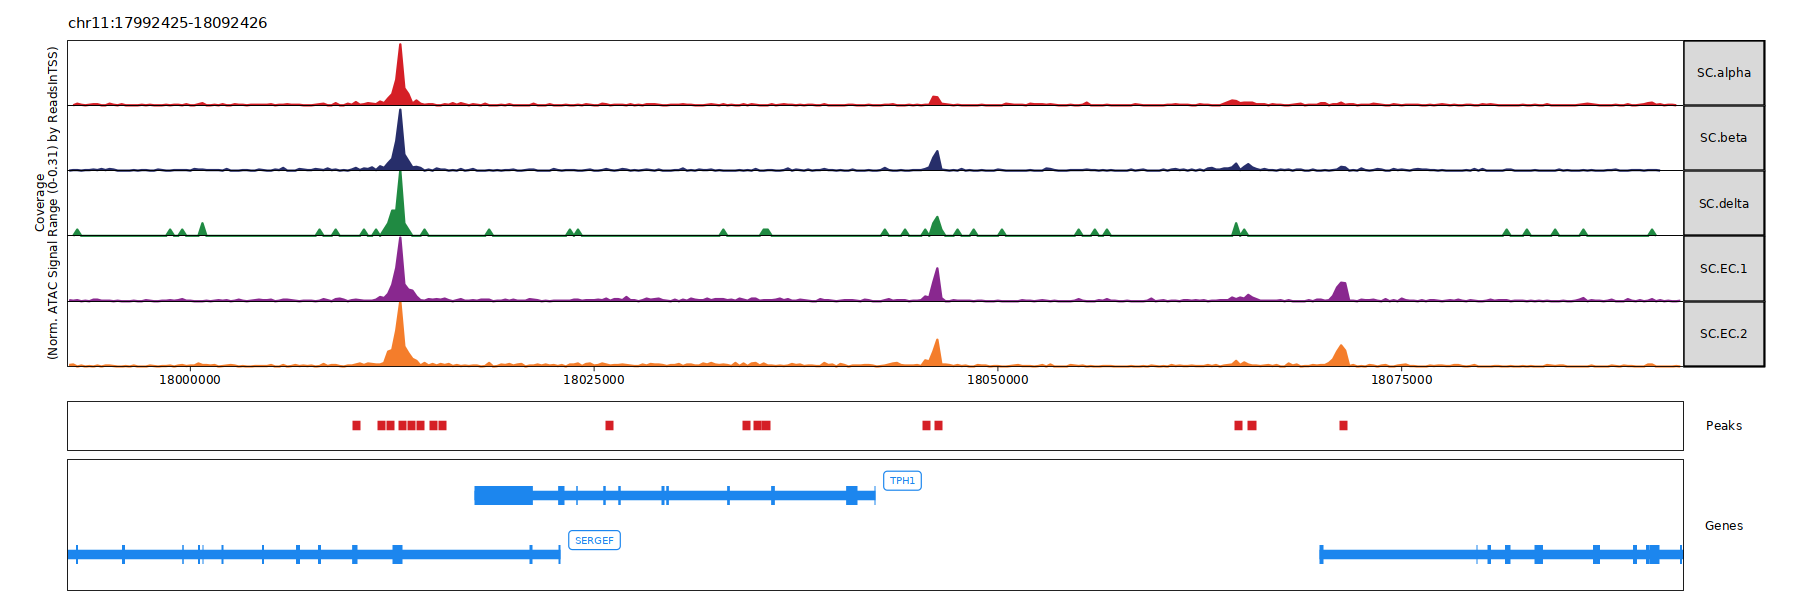

In [44]:
grid::grid.newpage()
grid::grid.draw(p$TPH1)

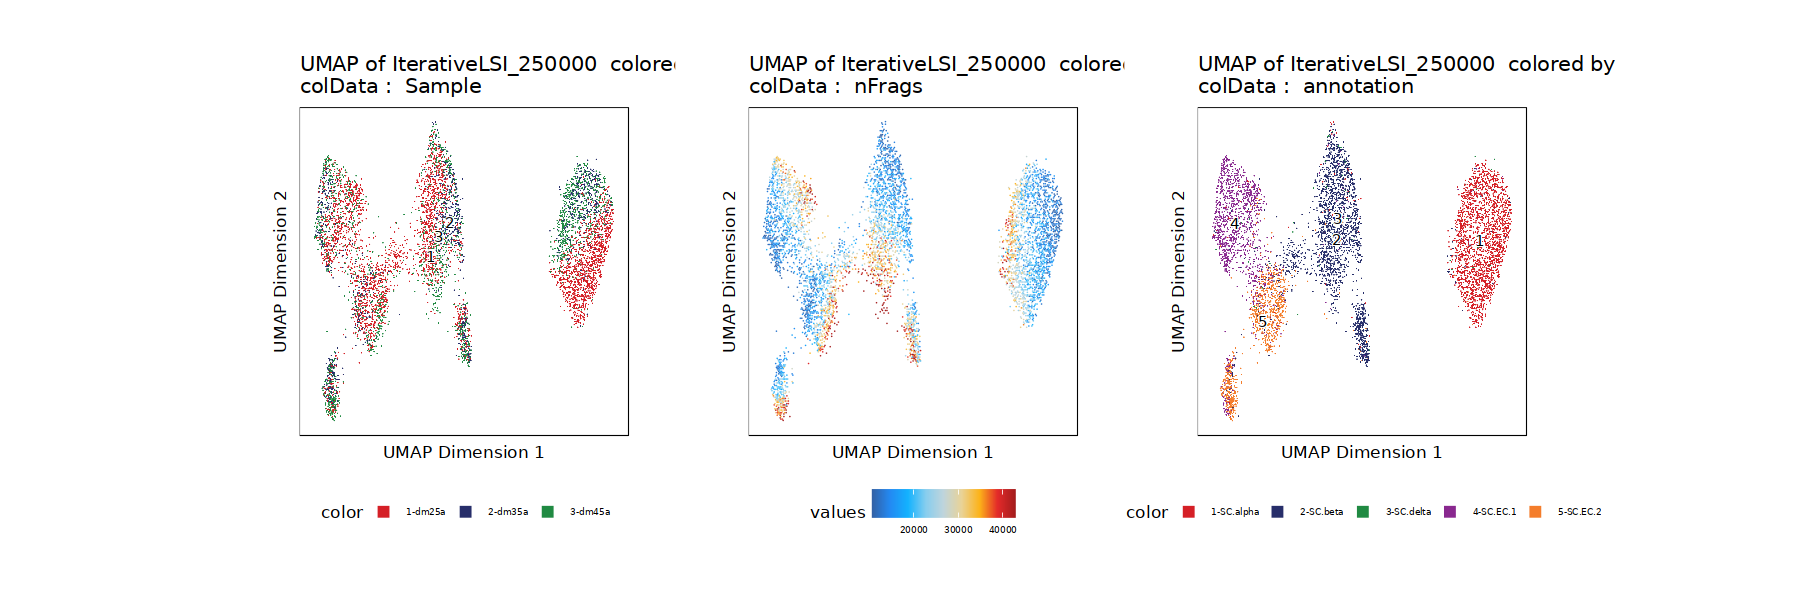

In [29]:
options(repr.plot.width=15, repr.plot.height=5)
p1 + p2 + p3

In [47]:
macs2_path = "/cellar/users/aklie/opt/miniconda3/envs/chrombpnet/bin/macs2"

In [30]:
# Table the annotation column
table(getCellColData(proj, "Sample"), getCellColData(proj, "annotation"))

       annotation
Sample  SC.alpha SC.beta SC.delta SC.EC.1 SC.EC.2
  dm25a     1131    1005       15     689     457
  dm35a      321     416        9     191     146
  dm45a      576     609       19     384     320

# DONE!

---